# Exercise 1

In [2]:
using CSV, DataFrames, Statistics, StatsPlots

In [3]:
function save_report(file_path::String, content::String)
    open(file_path, "w") do f
        write(f, content)
    end
end

save_report (generic function with 1 method)

In [4]:
function read_csv(file_path::String) # Read
    return CSV.read(file_path, DataFrame)
end

read_csv (generic function with 1 method)

In [5]:
function ensure_numeric(data::DataFrame) # Ensure data is numeric where it can; handling missing values
    println("Tipos iniciales de las columnas:")
    for col in names(data)
        println("$col: $(eltype(data[!, col]))")
    end

    for col in names(data)
        if eltype(data[!, col]) <: Union{Missing, Number} # If the column is already numeric, but has missing values, we do not convert
            continue
        elseif eltype(data[!, col]) <: AbstractString
            try
                data[!, col] = parse.(Float64, replace.(data[!, col], missing => "NaN"))
                println("Columna $col convertida a Float64.")
            catch e
                println("No se pudo convertir la columna $col a Float64: $e")
            end
        else
            println("Columna $col no es de tipo compatible para conversión.")
        end
    end

    println("Tipos finales de las columnas:")
    for col in names(data)
        println("$col: $(eltype(data[!, col]))")
    end

    return data
end

ensure_numeric (generic function with 1 method)

In [6]:
function missing_percentage(data::DataFrame) # Calculate missing ones
    total_rows = nrow(data)
    return Dict(col => count(ismissing, data[!, col]) / total_rows * 100 for col in names(data))
end

# Eliminate columns with missing data above threshold
function deleteColumns(data::DataFrame, threshold::Float64)
    missing_perc = missing_percentage(data)
    keep_cols = [col for col in names(data) if missing_perc[col] <= threshold]
    deleted_cols = setdiff(names(data), keep_cols)  # Capture eliminated columns 
    return data[:, keep_cols], deleted_cols
end

deleteColumns (generic function with 1 method)

In [7]:
function cal_correlation(data::DataFrame) # Correlation matrix
    numeric_cols = names(data)[map(c -> eltype(data[!, c]) <: Number, names(data))]
    numeric_data = data[:, numeric_cols]
    return cor(Matrix(numeric_data))
end

cal_correlation (generic function with 1 method)

In [8]:
function display_correlation(data::DataFrame, img_path::String) # Show correlation matrix using heatmap and save image ...
    corr_matrix = cal_correlation(data)
    heatmap(corr_matrix, title="Matriz de correlación", xlabel="Columnas", ylabel="Columnas")
    savefig(img_path)  # Save image in file
    display(heatmap(corr_matrix))  # Show heatmap
end

display_correlation (generic function with 1 method)

In [9]:
function remove_outliers_IQR(data::DataFrame) # Eliminate outliers with interquartile range
    numeric_cols = names(data)[map(c -> eltype(data[!, c]) <: Number, names(data))]
    original_rows = nrow(data)  # Num of rows before removing outliers
    for col in numeric_cols
        q1, q3 = quantile(data[!, col], [0.25, 0.75])
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        data = filter(row -> (row[col] ≥ lower_bound) && (row[col] ≤ upper_bound), data)
    end
    deleted_rows = original_rows - nrow(data)  # Num of rows deleted
    println("Se eliminaraon $deleted_rows filas por outliers con el IQR.")
    return data, deleted_rows
end

remove_outliers_IQR (generic function with 1 method)

In [10]:
function describe_data(data::DataFrame)
    return DataFrames.describe(data)
end

describe_data (generic function with 1 method)

In [11]:
function process_csv(file_path::String, missing_threshold::Float64) # Principal processing function
    data = read_csv(file_path)
    println("Archivo leído con ", nrow(data), " filas y ", ncol(data), " columnas.")
    
    data = ensure_numeric(data) 
    println("Tipos de datos después de asegurar numéricos: ", eltype.(eachcol(data)))
    
    println("Porcentaje de datos faltantes por columna:")
    missing_percentages = missing_percentage(data)
    println(missing_percentages)
    
    data, deleted_cols = deleteColumns(data, missing_threshold)  # Eliminate data
    println("Columnas eliminadas: ", deleted_cols)
    
    return data, missing_percentages, deleted_cols
end

process_csv (generic function with 1 method)

In [12]:
file_path = "/Users/michelletorres/Desktop/Homeworks AI/archive/bottle.csv"
missing_threshold = 10.0  # Max percentage

10.0

In [13]:
processed_data, missing_percentages, deleted_cols = process_csv(file_path, missing_threshold) # Process data
description = describe_data(processed_data) # Data set description
processed_data, deleted_rows = remove_outliers_IQR(processed_data) # Eliminate outliers

Archivo leído con 864863 filas y 74 columnas.
Tipos iniciales de las columnas:
Cst_Cnt: Int64
Btl_Cnt: Int64
Sta_ID: String15
Depth_ID: String
Depthm: Int64
T_degC: Union{Missing, Float64}
Salnty: Union{Missing, Float64}
O2ml_L: Union{Missing, Float64}
STheta: Union{Missing, Float64}
O2Sat: Union{Missing, Float64}
Oxy_µmol/Kg: Union{Missing, Float64}
BtlNum: Union{Missing, Int64}
RecInd: Int64
T_prec: Union{Missing, Int64}
T_qual: Union{Missing, Int64}
S_prec: Union{Missing, Int64}
S_qual: Union{Missing, Int64}
P_qual: Union{Missing, Int64}
O_qual: Union{Missing, Int64}
SThtaq: Union{Missing, Int64}
O2Satq: Union{Missing, Int64}
ChlorA: Union{Missing, Float64}
Chlqua: Union{Missing, Int64}
Phaeop: Union{Missing, Float64}
Phaqua: Union{Missing, Int64}
PO4uM: Union{Missing, Float64}
PO4q: Union{Missing, Int64}
SiO3uM: Union{Missing, Float64}
SiO3qu: Union{Missing, Int64}
NO2uM: Union{Missing, Float64}
NO2q: Union{Missing, Int64}
NO3uM: Union{Missing, Float64}
NO3q: Union{Missing, Int64}


(790980×24 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      9 │       1        9  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
     10 │       1       10  054.0 056.0  19

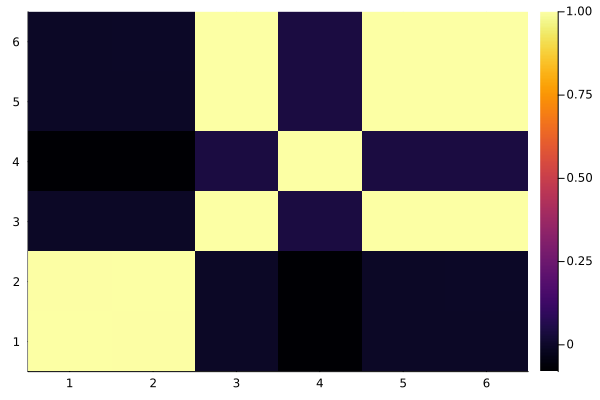

In [14]:
heatmap_img_path = "/Users/michelletorres/Desktop/heatmap.png" # Save img heatmap
display_correlation(processed_data, heatmap_img_path)

In [15]:
# Report/text
report_content = """
Informe de Análisis Exploratorio de Datos (EDA)

1. Información general:
El archivo contiene $(nrow(processed_data)) filas y $(ncol(processed_data)) columnas.
   
2. Porcentaje de datos faltantes por columna:
   $(missing_percentages)

3. Columnas eliminadas debido a datos faltantes:
   $(deleted_cols)

4. Descripción de los datos:
   $(description)

5. Outliers eliminados con el IQR:
$deleted_rows

6. Matriz de correlación:
$heatmap_img_path
   
7. Conclusión:
Se completó el análisis de manera satisfactoria, limpiando los datos faltantes, eliminando outliers y mostrando la matriz de correlación entre las variables.

"""

"Informe de Análisis Exploratorio de Datos (EDA)\n\n1. Información general:\nEl archivo contiene 790980 filas y 24 columnas.\n   \n2. Porcentaje de datos faltantes por columna:\n   Dict(\"pH2\" => 99.99884374750683, \"SiO3uM\" => 59.058139844114045, \"LightP\" => 97.84347347498968, " ⋯ 6730 bytes ⋯ "ados con el IQR:\n73883\n\n6. Matriz de correlación:\n/Users/michelletorres/Desktop/heatmap.png\n   \n7. Conclusión:\nSe completó el análisis de manera satisfactoria, limpiando los datos faltantes, eliminando outliers y mostrando la matriz de correlación entre las variables.\n\n"

In [16]:
report_path = "/Users/michelletorres/Desktop/EDA_report.txt" # Save 
save_report(report_path, report_content)

7277